<a href="https://colab.research.google.com/github/DevanshD3/Clustering-Algorithms/blob/main/GaussianMix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import load_files
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:

# for reproducibility
random_state = 0 

DATA_DIR = "/content/drive/MyDrive/Data/CV.csv"
df = pd.read_csv(DATA_DIR, low_memory= False)
df.head()

,Author ID,Modified Description,ID
0,27348,Simple latch with two cross-coupled NOR gates.,137750
1,47272,Laboratorio. Sesión 3.FUNDAMENTOS DE COMPUTADORES,229813
2,36805,This is a 7 segment display.,249268
3,36489,Este bloque les servirá para el examen parcial,232819
4,30771,The external clock is directly connected to al...,249264


In [ ]:
vec = TfidfVectorizer(stop_words='english')
df['Modified Description'] = df['Modified Description'].fillna('')
vec_matrix = vec.fit_transform(df['Modified Description'])
features = vec.transform(df['Modified Description'])
print(features)

  (0, 9931)	0.3227931164197924
  (0, 6506)	0.40802933946806075
  (0, 5173)	0.25773776809552934
  (0, 3263)	0.5611565857574715
  (0, 3210)	0.5899077820163157
  (1, 9795)	0.5201365271425246
  (1, 6467)	0.42967167566533615
  (1, 5089)	0.5634737543685681
  (1, 2935)	0.476799299916481
  (2, 9670)	0.7430862931318738
  (2, 3940)	0.6691956073970681
  (3, 9791)	0.4550963892643165
  (3, 8092)	0.36461795716737266
  (3, 8082)	0.244302462048003
  (3, 6588)	0.3533498829631091
  (3, 4595)	0.39183564968111356
  (3, 4539)	0.3236684347770153
  (3, 4269)	0.26231346757082874
  (3, 2196)	0.3850927183625514
  (4, 11477)	0.14436558388169132
  (4, 10812)	0.1821684703326401
  (4, 10764)	0.12804152439100075
  (4, 10465)	0.14092347226783963
  (4, 10225)	0.13382659950075762
  (4, 9902)	0.1595904952544354
  :	:
  (6028, 11637)	0.832091666124507
  (6028, 5150)	0.5546381335304505
  (6029, 10118)	0.5142487328997064
  (6029, 9847)	0.5142487328997064
  (6029, 4215)	0.34623771748932497
  (6029, 315)	0.2945575752224373
 

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())


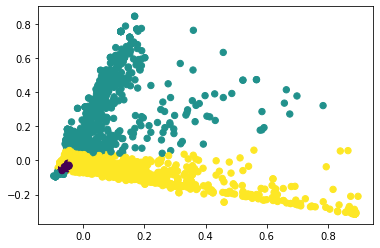

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(reduced_features)
labels = gmm.predict(reduced_features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, s=40, cmap='viridis');